In [1]:
# ============================================
# ARCHIVO PRINCIPAL O INICIO DEL NOTEBOOK
# ============================================

using Random
using Statistics

# Incluir archivos en orden (respetando dependencias)
include("parameters.jl")
include("update_rules.jl")
include("swap_criteria.jl")
include("observables.jl")
include("monte_carlo_general.jl")
include("plots.jl")

plot_comparison_parallel_vs_sequential

In [ ]:


# Correr simulación
result_parallel_swap_metropolis = run_monte_carlo_general(
    params,
    N_samples = 1000,
    initial_probs = fill(0.5, 20),
    T_steps = 100,
    update_rule = :parallel,
    swap_criterion = :metropolis,
    observables = [:magnetization, :energy, :nn_correlation, :overlap]
)

result_glauber_swap_metropolis = run_monte_carlo_general(
    params,
    N_samples = 1000,
    initial_probs = fill(0.5, 20),
    T_steps = 100,
    update_rule = :sequential,
    swap_criterion = :metropolis,
    observables = [:magnetization, :energy, :nn_correlation, :overlap]
)

result_metropolis_swap_metropolis = run_monte_carlo_general(
    params,
    N_samples = 1000,
    initial_probs = fill(0.5, 20),
    T_steps = 100,
    update_rule = :metropolis,
    swap_criterion = :metropolis,
    observables = [:magnetization, :energy, :nn_correlation, :overlap]
)



Dict{Symbol, Any} with 2 entries:
  :params      => MCParameters:…
  :observables => Dict{Symbol, Any}(:energy=>[1.216 2.114 … 11.126 0.0; 0.174 1…

In [3]:
result = result_metropolis_swap_metropolis

# Acceder a resultados
mag = result[:observables][:magnetization]
E = result[:observables][:energy]
overlap = result[:observables][:overlap]

1×101 Matrix{Float64}:
 0.0075  0.0052  0.0023  0.0015  -0.0012  …  -0.012  -0.0145  -0.0114  0.0

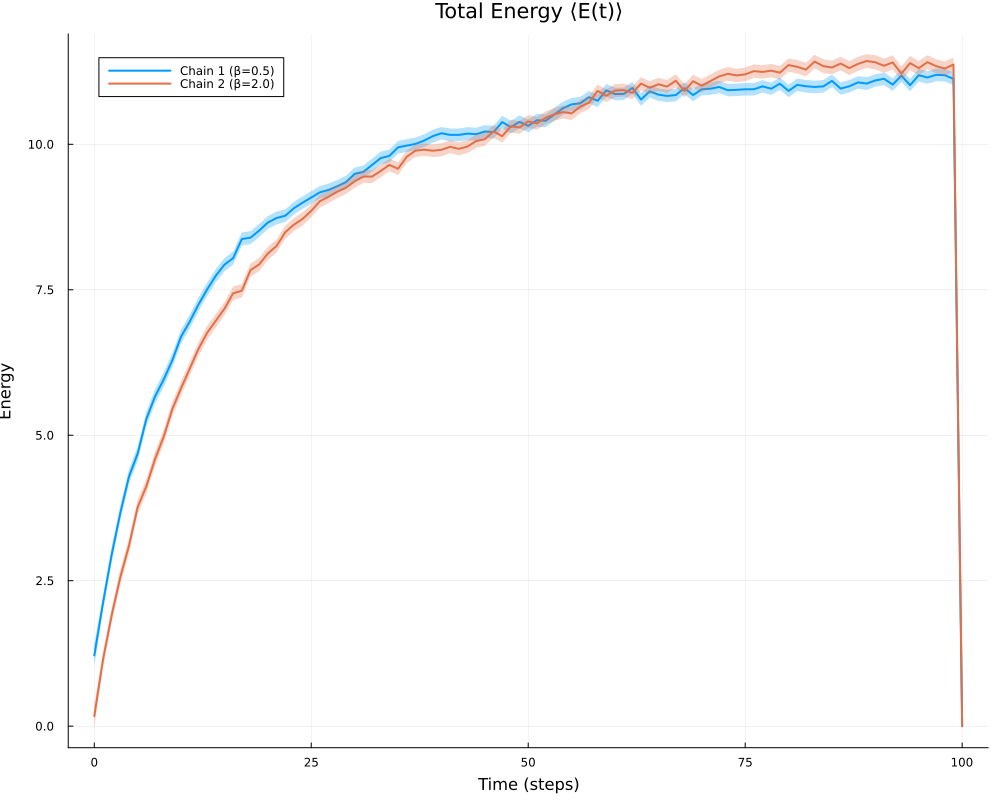

In [6]:
# # Plot general (automático)
# plot_results(results)


# # Solo algunos observables
plot_results(result, observables=[:energy])
